In [1]:
import pandas as pd
import os, glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [2]:
path_to_json = r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\new_data\batteryMilliVolts'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.jsonl')]

In [3]:
# from pathlib import Path
# print(Path(r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\new_data\batteryMilliVolts'))

In [4]:
def get_files(filepath): #récupère le nom de tous les fichiers jsonl
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.jsonl'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

In [5]:
# json_files = get_files(path_to_json)
# tmp_df = (pd.read_json(f,lines=True) for f in json_files)
# df = pd.concat(tmp_df, ignore_index=True)

In [16]:
json_files = get_files(path_to_json)
json_files_one_day = json_files[:600]
data = pd.DataFrame()
for i in json_files_one_day :
    temp_df = pd.read_json(i,lines=True)
    data = pd.concat([data, temp_df], ignore_index=True, sort=False)

In [29]:
df = data.copy()

In [18]:
df

,id,externalId,name,pfVehicleId,type,value,dateTime,providerType,metaDataProvider
0,990fca4a-7154-48f6-83fe-9f01ac507caf,212014918914371,PF-68289,PF-68289,batteryMilliVolts,12430,2021-11-02 09:59:15+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-02T09:59..."
1,937c3156-1dae-478b-8a00-f13aaacf684d,212014918914091,PF-82062,PF-82062,batteryMilliVolts,13065,2021-11-02 09:58:53+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-02T09:58..."
2,7aefc7a1-269e-44e7-8665-989188045b6e,212014918914528,PF-78480,PF-78480,batteryMilliVolts,11693,2021-11-02 09:59:11+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-02T09:59..."
3,1bd5dead-225b-46ad-9b95-5af3d217dbee,212014918914680,PF-60808,PF-60808,batteryMilliVolts,12669,2021-11-02 09:59:07+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-02T09:59..."
4,11f103a2-3b32-466c-9150-37290c11f3dc,212014918914609,PF-89134,PF-89134,batteryMilliVolts,25659,2021-11-02 09:59:09+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-02T09:59..."
...,...,...,...,...,...,...,...,...,...
2375307,7037d81c-e64d-4e38-9f64-3ba0e7191fa6,844424930175218,PF-72527,PF-72527,batteryMilliVolts,25802,2021-11-03 14:01:06+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-03T14:01..."
2375308,2486ec32-957e-47e4-b022-97429828de35,844424930177434,PF-70197,PF-70197,batteryMilliVolts,12804,2021-11-03 14:25:34+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-03T14:25..."
2375309,0bc052c0-c325-45c5-b348-874c49aec0b6,844424930178622,PF-10064,PF-10064,batteryMilliVolts,25848,2021-11-03 14:24:49+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-03T14:24..."
2375310,4770ce41-18e5-4d7a-896d-6abafc9d03cf,844424930174239,PF-64694,PF-64694,batteryMilliVolts,25676,2021-11-03 14:25:16+00:00,Samsara,"{""batteryMilliVolts"":{""time"":""2021-11-03T14:25..."


In [23]:
df["name"].value_counts()

PF-70651                2980
METZ 01/2               1424
BORDEAUX 03/3 RELAIS    1358
PF-79578                1087
PF-95304                 872
                        ... 
G394-MYF-6B7               1
ST-15743                   1
PF-88521                   1
PF-104129                  1
PF-97660                   1
Name: name, Length: 3256, dtype: int64

In [61]:
path_to_json2 = r'C:\Users\NGH\Documents\Stage Ari\ArkeUp\new_data\alarms'
json_files2 = get_files(path_to_json2)
json_files_one_day2 = json_files2
alarm_data = pd.DataFrame()
for i in json_files_one_day2 :
    alarm_temp_df = pd.read_json(i,lines=True)
    alarm_data = pd.concat([alarm_data, alarm_temp_df], ignore_index=True, sort=False)

In [62]:
alarm_df = alarm_data.copy()
alarm_df

,id,externalId,name,pfVehicleId,make,model,type,dateTime,providerType,metaDataProvider,timestamp,alarms
0,9cbf1114-9d31-4405-8050-f5ffac980d06,844424930188817,PF-97103,PF-97103,Carrier EU,Xarios,alarms,2021-10-29 04:51:49.903000+00:00,Samsara,"{""alarms"":{""changedAtTime"":""2021-10-29T04:51:4...",2021-10-29 04:51:49,NaN
1,15a71e2d-1cad-4d22-a515-3725eb08c606,844424930183406,PF-102439,PF-102439,Carrier EU,Xarios,alarms,2021-11-02 09:24:54.607000+00:00,Samsara,"{""alarms"":{""changedAtTime"":""2021-11-02T09:24:5...",2021-11-02 09:24:54,NaN
2,d1d3920b-9c9c-4042-bbae-c345d01bb0ff,212014918914849,PF-95375,PF-95375,Carrier EU,Pulsor,alarms,2021-11-02 09:29:44.406000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""P021"",""desc...",2021-11-02 09:29:44,"[{'alarmCode': 'P021', 'description': 'Undefin..."
3,304f38ad-8317-4d59-85cd-87f158e0ca8c,212014918914852,PF-81594,PF-81594,Carrier EU,Xarios,alarms,2021-11-02 05:41:25.648000+00:00,Samsara,"{""alarms"":{""changedAtTime"":""2021-11-02T05:41:2...",2021-11-02 05:41:25,NaN
4,84c1a9be-c6db-464d-a4a9-0b0692925b93,212014918914680,PF-60808,PF-60808,Carrier EU,Xarios,alarms,2021-11-01 21:34:44.393000+00:00,Samsara,"{""alarms"":{""changedAtTime"":""2021-11-01T21:34:4...",2021-11-01 21:34:44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20260,78bde84d-4d65-4500-8d12-2b0873635ed1,212014918915202,PF-80029,PF-80029,Carrier EU,Pulsor,alarms,2021-11-30 22:54:37.280000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""A155"",""desc...",2021-11-30 22:54:37,"[{'alarmCode': 'A155', 'description': 'Undefin..."
20261,9bc1c531-bd58-4737-bc23-8e0fd018b4b6,844424930169014,PF-99773,PF-99773,Carrier EU,Pulsor,alarms,2021-11-30 22:57:21.827000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""P021"",""desc...",2021-11-30 22:57:21,"[{'alarmCode': 'P021', 'description': 'Undefin..."
20262,a54767fb-a195-44d6-aa1a-c49411c3aa04,844424930198266,PF-99622,PF-99622,Carrier EU,Pulsor,alarms,2021-11-30 23:19:23.347000+00:00,Samsara,"{""alarms"":{""changedAtTime"":""2021-11-30T23:19:2...",2021-11-30 23:19:23,NaN
20263,a1371ff1-743d-4f40-bcfb-4cc7e6b82ee0,844424930169509,PF-79845,PF-79845,Carrier EU,Xarios,alarms,2021-11-30 23:21:23.468000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""P01"",""descr...",2021-11-30 23:21:23,"[{'alarmCode': 'P01', 'description': 'Low pres..."


In [84]:
df_mask=alarm_df['metaDataProvider'].str.find('volt')

Int64Index([  278,   814,  2646,  2978,  3098,  4428,  5077,  5768,  7609,
             7624,  8240,  9006,  9256, 10202, 11753, 11909, 11974, 12552,
            14281, 14347, 17516, 17543, 17774, 17863, 18123, 18388, 18459,
            18760, 18975, 19400, 20007, 20027],
           dtype='int64')

In [100]:
alarm_df['metaDataProvider'][278]

'{"alarms":{"alarms":[{"alarmCode":"DA-BAT","description":"Battery low voltage alarm","severity":"red"}],"changedAtTime":"2021-11-02T10:10:33.840Z"}}'

In [86]:
alarm_battery_df =  pd.DataFrame(alarm_df,index=df_mask.loc[df_mask == 70].index)
alarm_battery_df

,id,externalId,name,pfVehicleId,make,model,type,dateTime,providerType,metaDataProvider,timestamp,alarms
278,2bd51e08-739d-409e-8037-06540595769d,212014918914507,PF-70652,PF-70652,Carrier EU,Xarios,alarms,2021-11-02 10:10:33.840000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-02 10:10:33,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
814,969ee237-0b70-4d30-8064-75de36ca18db,212014918914507,PF-70652,PF-70652,Carrier EU,Xarios,alarms,2021-11-03 06:18:40.148000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-03 06:18:40,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
2646,1061128b-a979-47ff-898d-d81a70beff00,212014918915238,PF-92107,PF-92107,Carrier EU,Xarios,alarms,2021-11-04 14:03:37.287000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-04 14:03:37,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
2978,8c8068f0-d61f-4c75-a94a-4febd8a053d8,212014918914595,PF-67516,PF-67516,Carrier EU,Xarios,alarms,2021-11-05 05:24:56.768000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-05 05:24:56,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
3098,d15c94cd-1f8f-44af-9cdf-193630b9bafa,844424930161953,PF-99550,PF-99550,Carrier EU,Xarios,alarms,2021-11-05 06:40:38.812000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-05 06:40:38,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
4428,05ba5fe1-b48c-445e-a7b9-9e626ad00f30,212014918914232,PF-83979,PF-83979,Carrier EU,Xarios,alarms,2021-11-07 04:04:13.257000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-07 04:04:13,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
5077,454154aa-266a-4c32-b3e9-fbb0854e6ab8,212014918914167,PF-73354,PF-73354,Carrier EU,Xarios,alarms,2021-11-08 08:36:24.950000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-08 08:36:24,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
5768,57626ba6-9ba6-470e-9e4d-76636a988328,844424930186008,PF-101756,PF-101756,Carrier EU,Xarios,alarms,2021-11-09 03:38:06.388000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-09 03:38:06,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
7609,4c7b8b60-9629-4daa-9cf3-7c6beedd291f,212014918914715,PF-68283,PF-68283,Carrier EU,Xarios,alarms,2021-11-10 08:34:29.075000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-10 08:34:29,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."
7624,7d01ded0-a8bd-4a60-94c0-080be83cadb8,212014918914243,PF-92270,PF-92270,Carrier EU,Xarios,alarms,2021-11-10 08:50:35.885000+00:00,Samsara,"{""alarms"":{""alarms"":[{""alarmCode"":""DA-BAT"",""de...",2021-11-10 08:50:35,"[{'alarmCode': 'DA-BAT', 'description': 'Batte..."


In [113]:
df.loc[(df.name == "PF-70652")& ((df['dateTime'] >= '2021-11-02 09:40:00')&(df['dateTime'] <= '2021-11-02 10:40:00'))|((df['dateTime'] >= '2021-11-02 09:48:00')&(df['dateTime'] <= '2021-11-02 10:48:00')) ]#intervalle de 1 heure

,id,externalId,name,value,dateTime,normalized_value,harshAccelerationSettingType
0,914815,212014918914371,PF-68289,12430,2021-11-02 09:59:15+00:00,-0.986970,lightTruck
1,881721,212014918914091,PF-82062,13065,2021-11-02 09:58:53+00:00,-0.936824,lightTruck
2,733993,212014918914528,PF-78480,11693,2021-11-02 09:59:11+00:00,-1.045171,lightTruck
3,165712,212014918914680,PF-60808,12669,2021-11-02 09:59:07+00:00,-0.968096,lightTruck
4,106602,212014918914609,PF-89134,25659,2021-11-02 09:59:09+00:00,0.057727,heavyDuty
...,...,...,...,...,...,...,...
503361,1396029,844424930182788,PF-78113,24303,2021-11-02 10:16:37+00:00,-0.049356,heavyDuty
503363,1396029,844424930182788,PF-78113,24303,2021-11-02 10:02:29+00:00,-0.049356,heavyDuty
503364,1396029,844424930182788,PF-78113,24309,2021-11-02 10:30:43+00:00,-0.048883,heavyDuty
503366,1396029,844424930182788,PF-78113,24303,2021-11-02 10:40:47+00:00,-0.049356,heavyDuty


# Preprocessing - nettoyage des données 🧹

In [30]:
df = df.drop(["type","metaDataProvider","pfVehicleId","providerType"], axis=1)

In [31]:
df = df.dropna(subset=['name', 'value','dateTime'])

In [32]:
battery_as_array = np.array(df["value"]).reshape(-1, 1)
df["normalized_value"]= RobustScaler().fit_transform(battery_as_array)
rs_inverse = RobustScaler().fit(battery_as_array)#dénormalise

In [33]:
label = LabelEncoder()
df['id']=label.fit_transform(df['id'])

## Répartition des véhicules lourds et légers 🚚🚛

In [34]:
for vehicle in df['name'].unique():
    val_max = df['value'].loc[(df.name == vehicle)].max()
    if val_max <15000 :
        df.loc[df['name'] == vehicle , 'harshAccelerationSettingType'] = 'lightTruck' 
    else : 
        df.loc[df['name'] == vehicle , 'harshAccelerationSettingType'] = 'heavyDuty'

In [35]:
df_heavy = df.loc[df['harshAccelerationSettingType'] == 'heavyDuty']
df_light = df.loc[df['harshAccelerationSettingType'] == 'lightTruck']

### Test set - Choix du camion et de la période 🚚📆

In [357]:
df_test = df.loc[df.name == 'PF-70652'] #véhicule léger 
#df_test = df.loc[df.name == 'PF-79578'] #véhicule lourd 

### Train set 🚚

In [358]:
if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
    df_train=df.loc[df.name == 'PF-70651'] # train avec 1 véhicule léger
else :
    df_train=df.loc[df.name == 'METZ 01/2'] # train avec 1 véhicule lourd
df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')])

C:\Users\NGH\AppData\Local\Temp\ipykernel_11928\4117308253.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
# if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
#     df_train = df_light.copy() # entraînement sur tous les véhicules légers
# else :
#     df_train = df_heavy.copy() # entraînement sur tous les véhicules lourds
# df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')])

In [264]:
# df_train = df.copy() # entraînement sur tous les véhicules confondus
# df_train['dateTime']=pd.to_datetime(df_train.loc[:, ('dateTime')]) # conversion de la colonne en type datetime
# df_train=df_train[df_train['dateTime'].dt.year > 2020]

## Intervalle possible d'anomalies

In [359]:
if df_test['harshAccelerationSettingType'].unique() ==  'lightTruck' :
    #anomalies réelles du test poids léger
    ##intervalle d'une heure
    #alert_test = df.loc[(df.name == "PF-70652")& (df['dateTime'] >= '2021-11-02 09:40:00')&(df['dateTime'] <= '2021-11-02 10:40:00')] #1ère alarme 
    alert_test = df.loc[(df.name == "PF-70652")& (df['dateTime'] >= '2021-11-03 05:48:00')&(df['dateTime'] <= '2021-11-03 06:48:00')] #2ème alarme 
# else :
#     alert_test = alert_df.loc[alert_df.name == 'PF-85403'] #anomalies réelles du test poids lourd
#     alert_train = alert_df.loc[alert_df.name == 'PF-65062']#anomalies du train poids lourd

## Séries temporelles

J'ai entraîné le réseau sur une série régularisée, en prenant les valeurs moyennes de batterie à chaque heure, pour simplifier et accélérer le temps d'entraînement du modèle.

In [360]:
serie_train = df_train.set_index('dateTime')
resampled_train = serie_train.interpolate()
#resampled_train = serie_train.resample('1H').mean().interpolate() # resample pour de grosses data
resampled_train = resampled_train.reset_index()
resampled_train=resampled_train.sort_values(by='dateTime')

In [361]:
serie_test = df_test.set_index('dateTime')
resampled_test = serie_test.interpolate()
resampled_test = resampled_test.reset_index()
resampled_test=resampled_test.sort_values(by='dateTime')

In [362]:
import plotly.graph_objects as go

In [363]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resampled_train.dateTime, y=resampled_train['value'], mode='lines',name='Train'))
fig.add_trace(go.Scatter(x=resampled_test.dateTime, y=resampled_test['value'],mode='lines',name='Test',line=dict(color="#00ff00")))
fig.add_trace(go.Scatter(x=alert_test.dateTime, y=alert_test['value'],mode='markers',name='Potential Test anomalies',marker_size=8,line=dict(color="#ff1300")))
fig.update_layout(title="Comparaison série train et test",xaxis_title="Date",yaxis_title="Battery mV")
fig.show()

# Neural Network 🧠


Jason Brownlee (21/07/2016). Time Series Prediction with LSTM Recurrent Neural Networks. Consulté à l’adresse : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [364]:
import tensorflow as tf
from tensorflow import keras

### Séparation en train set et test set 

In [365]:
train, test = resampled_train, resampled_test

In [366]:
def create_dataset(X,Y,time_steps=1): # crée nos datasets train et test
    Xs, Ys = [],[]
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        Ys.append(Y.iloc[i+time_steps])
        
    return np.array(Xs), np.array(Ys)

In [367]:
TIME_STEPS = 24

X_train, Y_train = create_dataset(train[['normalized_value']], train.normalized_value, TIME_STEPS)
X_test, Y_test = create_dataset(test[['normalized_value']], test.normalized_value, TIME_STEPS)

### Création du modèle 

In [368]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(64,return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

### Training

In [369]:
history=model.fit(X_train, Y_train,epochs=10,batch_size=64*8,validation_split = 0.1,shuffle=False)

Epoch 1/10
6/6 [==============================] - 8s 455ms/step - loss: 0.6403 - val_loss: 0.2180
Epoch 2/10
6/6 [==============================] - 1s 224ms/step - loss: 0.2755 - val_loss: 0.1392
Epoch 3/10
6/6 [==============================] - 1s 231ms/step - loss: 0.2089 - val_loss: 0.1387
Epoch 4/10
6/6 [==============================] - 1s 228ms/step - loss: 0.1719 - val_loss: 0.1500
Epoch 5/10
6/6 [==============================] - 1s 215ms/step - loss: 0.1583 - val_loss: 0.1262
Epoch 6/10
6/6 [==============================] - 1s 212ms/step - loss: 0.1497 - val_loss: 0.1080
Epoch 7/10
6/6 [==============================] - 1s 222ms/step - loss: 0.1386 - val_loss: 0.0936
Epoch 8/10
6/6 [==============================] - 1s 236ms/step - loss: 0.1313 - val_loss: 0.0841
Epoch 9/10
6/6 [==============================] - 1s 228ms/step - loss: 0.1226 - val_loss: 0.0828
Epoch 10/10
6/6 [==============================] - 1s 230ms/step - loss: 0.1183 - val_loss: 0.0764


### Visualisation de la fonction perte

In [370]:
import seaborn as sns

93/93 [==============================] - 2s 12ms/step


C:\Users\NGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



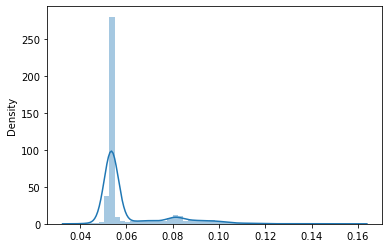

In [371]:
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred-X_train),axis=1)
sns.distplot(train_mae_loss, bins=50, kde=True);

24/24 [==============================] - 0s 12ms/step


C:\Users\NGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



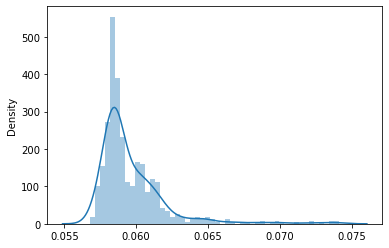

In [372]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test),axis=1)
sns.distplot(test_mae_loss, bins=50, kde=True);

### Choix du seuil

In [378]:
#seuil à choisir pour couper les données normales / anormales
#seuils véhicule léger en test
THRESHOLD = 0.063 # (train 1 véhicule de même gabarit)
#THRESHOLD = 0.633 #(train sur tous véhicules de même gabarit)
#THRESHOLD = 0.425 # seuil train dataset entier

#seuils véhicule lourd en test
#THRESHOLD = 5.75 #  (train 1 véhicule)
#THRESHOLD = 3 #  (train avec les autres véhicules de même gabarit)
#THRESHOLD = 6.0 # seuil train dataset entier

test_score_df = test[TIME_STEPS:].copy()
test_score_df['loss']= test_mae_loss
test_score_df['threshold']= THRESHOLD
test_score_df['anomaly']=test_score_df.loss > test_score_df.threshold

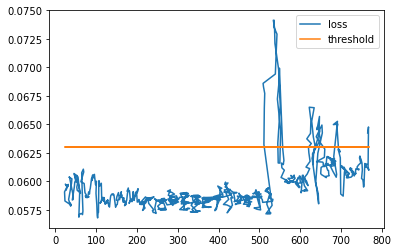

In [379]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.legend();

In [380]:
anomalies= test_score_df[test_score_df.anomaly == True]
anomalies

,dateTime,id,externalId,name,value,normalized_value,harshAccelerationSettingType,loss,threshold,anomaly
511,2021-11-03 06:20:28+00:00,1494250,212014918914507,PF-70652,11544,-1.056938,lightTruck,0.063244,0.063,True
512,2021-11-03 06:22:29+00:00,1161565,212014918914507,PF-70652,11792,-1.037353,lightTruck,0.066444,0.063,True
513,2021-11-03 06:24:29+00:00,561766,212014918914507,PF-70652,11880,-1.030404,lightTruck,0.067715,0.063,True
510,2021-11-03 06:26:31+00:00,492803,212014918914507,PF-70652,11874,-1.030877,lightTruck,0.068291,0.063,True
509,2021-11-03 06:28:31+00:00,1181043,212014918914507,PF-70652,11928,-1.026613,lightTruck,0.068596,0.063,True
539,2021-11-03 06:30:31+00:00,1368410,212014918914507,PF-70652,11965,-1.023691,lightTruck,0.069416,0.063,True
540,2021-11-03 06:32:33+00:00,1037968,212014918914507,PF-70652,11936,-1.025981,lightTruck,0.070233,0.063,True
541,2021-11-03 06:34:33+00:00,924833,212014918914507,PF-70652,11924,-1.026929,lightTruck,0.071260,0.063,True
542,2021-11-03 06:38:35+00:00,15130,212014918914507,PF-70652,11967,-1.023533,lightTruck,0.072160,0.063,True
543,2021-11-03 06:40:35+00:00,607273,212014918914507,PF-70652,12016,-1.019664,lightTruck,0.072913,0.063,True


C:\Users\NGH\AppData\Local\Temp\ipykernel_11928\1980103155.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\NGH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



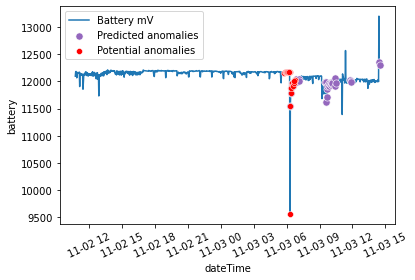

In [381]:
anomalies['battery']=rs_inverse.inverse_transform(np.array(anomalies.normalized_value).reshape(-1, 1))
plt.plot(test[TIME_STEPS:].dateTime, rs_inverse.inverse_transform(np.array(test_score_df['normalized_value']).reshape(-1, 1)),label='Battery mV',zorder=-1)
sns.scatterplot(anomalies.dateTime, anomalies['battery'],color=sns.color_palette()[4], s=52, label='Predicted anomalies',zorder=1)
sns.scatterplot(alert_test.dateTime, alert_test['value'], color='red', label = 'Potential anomalies',zorder=1)
plt.xticks(rotation=25)
plt.legend();

In [383]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resampled_test.dateTime, y=resampled_test['value'],mode='lines',name='Test',line=dict(color="#00ff00")))
fig.add_trace(go.Scatter(x=alert_test.dateTime, y=alert_test['value'],mode='markers',name='Potential anomalies',line=dict(color="#ff1300")))
fig.add_trace(go.Scatter(x=anomalies.dateTime, y=anomalies['battery'],mode='markers',name='Predicted anomalies',marker_size=8,line=dict(color="#B900FF")))
fig.update_layout(title="Predicted vs Expected",xaxis_title="Date",yaxis_title="Battery mV")
fig.show()